In [2]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [4]:
raw_data = pd.read_csv(os.getcwd()+'/retail_sales_dataset.csv')

In [6]:
df = raw_data

## Inspect Data

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [11]:
df.describe()

,Transaction ID,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,41.39200,2.514000,179.890000,456.000000
std,288.819436,13.68143,1.132734,189.681356,559.997632
min,1.000000,18.00000,1.000000,25.000000,25.000000
25%,250.750000,29.00000,1.000000,30.000000,60.000000
50%,500.500000,42.00000,3.000000,50.000000,135.000000
75%,750.250000,53.00000,4.000000,300.000000,900.000000
max,1000.000000,64.00000,4.000000,500.000000,2000.000000


In [13]:
df.shape

(1000, 9)

In [15]:
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [17]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')

In [19]:
df = df.sort_values(by='Date', ignore_index=True)

In [21]:
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,522,2023-01-01,CUST522,Male,46,Beauty,3,500,1500
1,180,2023-01-01,CUST180,Male,41,Clothing,3,300,900
2,559,2023-01-01,CUST559,Female,40,Clothing,4,300,1200
3,303,2023-01-02,CUST303,Male,19,Electronics,3,30,90
4,979,2023-01-02,CUST979,Female,19,Beauty,1,25,25


## Check for missing value

In [24]:
df.isnull().sum()

Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64

## Distribution

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction ID    1000 non-null   int64         
 1   Date              1000 non-null   datetime64[ns]
 2   Customer ID       1000 non-null   object        
 3   Gender            1000 non-null   object        
 4   Age               1000 non-null   int64         
 5   Product Category  1000 non-null   object        
 6   Quantity          1000 non-null   int64         
 7   Price per Unit    1000 non-null   int64         
 8   Total Amount      1000 non-null   int64         
dtypes: datetime64[ns](1), int64(5), object(3)
memory usage: 70.4+ KB


In [29]:
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,522,2023-01-01,CUST522,Male,46,Beauty,3,500,1500
1,180,2023-01-01,CUST180,Male,41,Clothing,3,300,900
2,559,2023-01-01,CUST559,Female,40,Clothing,4,300,1200
3,303,2023-01-02,CUST303,Male,19,Electronics,3,30,90
4,979,2023-01-02,CUST979,Female,19,Beauty,1,25,25


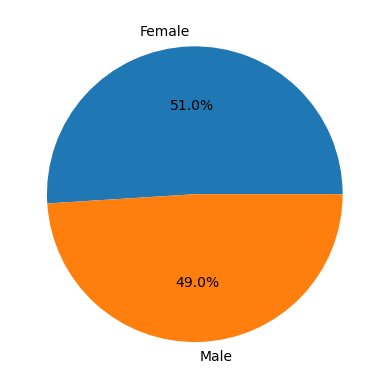

In [31]:
# Gender Distribtion

labels, count = np.unique(df['Gender'], return_counts=True)

plt.pie(count, labels=labels, autopct='%1.1f%%')
plt.show()

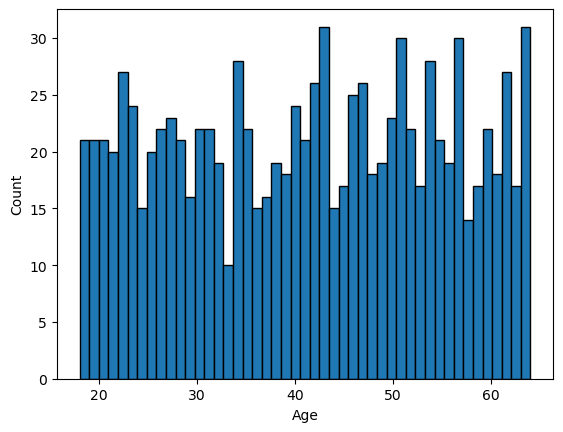

In [33]:
# Age Distribution
n_bins = len(df['Age'].unique())
plt.hist(df['Age'], bins=n_bins, edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Count')
plt.savefig(os.getcwd()+'/img'+'/agedistrib.png')
plt.show()

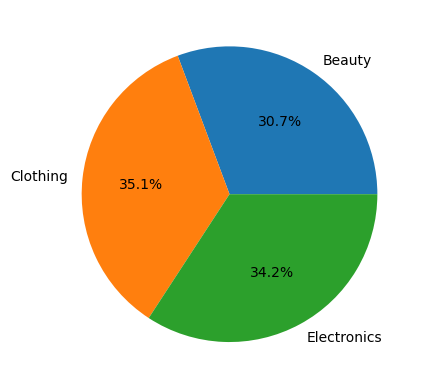

In [35]:
# Product Category Composition

cat, count = np.unique(df['Product Category'], return_counts=True)
plt.pie(count, labels=cat, autopct='%1.1f%%')
plt.savefig(os.getcwd()+'/img/'+'productcomp.png')
plt.show()

(array([253.,   0.,   0., 243.,   0.,   0., 241.,   0.,   0., 263.]),
 array([1. , 1.3, 1.6, 1.9, 2.2, 2.5, 2.8, 3.1, 3.4, 3.7, 4. ]),
 <BarContainer object of 10 artists>)

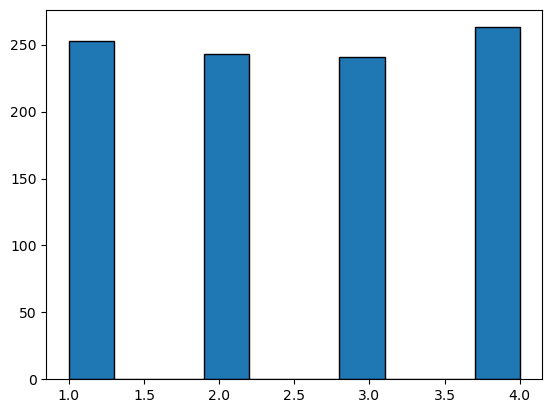

In [37]:
# Quantity distribution
plt.hist(df['Quantity'], edgecolor='black')

(array([604.,   0.,   0.,   0.,   0., 197.,   0.,   0.,   0., 199.]),
 array([ 25. ,  72.5, 120. , 167.5, 215. , 262.5, 310. , 357.5, 405. ,
        452.5, 500. ]),
 <BarContainer object of 10 artists>)

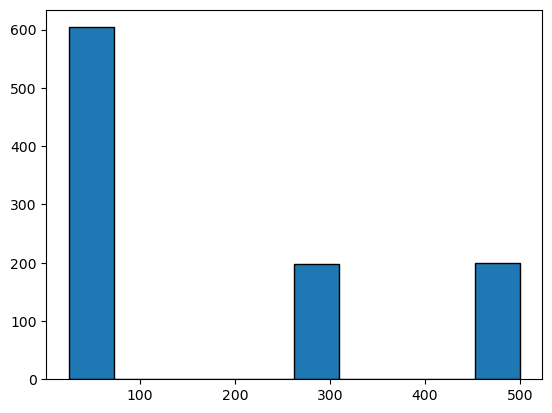

In [39]:
#Price per Unit Distribution

plt.hist(df['Price per Unit'], edgecolor='black')

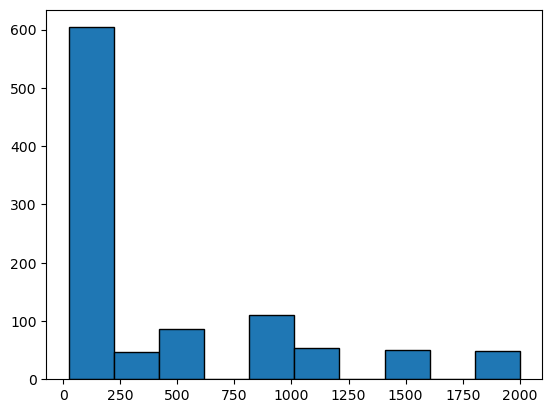

In [41]:
# Total Amount Distribution
plt.hist(df['Total Amount'], edgecolor='black')
plt.show()

## Skewness

In [44]:
stats.skew(df['Age'], axis=0, bias=True)

-0.04873920459342852

In [46]:
stats.skew(df['Price per Unit'], axis=0, bias=True)

0.7352028558846894

In [48]:
stats.skew(df['Quantity'], axis=0, bias=True)

-0.014014794765047325

In [50]:
stats.skew(df['Total Amount'], axis=0, bias=True)

1.3740631909684091

## Relationship

In [53]:
gender_enc = []
product_enc = []
age_group_enc = []

for i in range(df.shape[0]):
    if df['Gender'][i]== 'Male':
        gender_enc.append('0')
    else:
        gender_enc.append('1')
        
for i in range(df.shape[0]):
    if df['Product Category'][i]== 'Electronic':
        product_enc.append('1')
    elif df['Product Category'][i]== 'Clothing':
        product_enc.append('2')
    else:
        product_enc.append('3')

for i in range(df.shape[0]):
    if df['Age'][i] < 18:
        age_group_enc.append('1')
    elif df['Age'][i] >= 18 and df['Age'][i] < 25:
        age_group_enc.append('2')
    elif df['Age'][i] >= 25 and df['Age'][i] < 35:
        age_group_enc.append('3')
    elif df['Age'][i] >= 35 and df['Age'][i] < 45:
        age_group_enc.append('4')
    elif df['Age'][i] >= 45 and df['Age'][i] < 55:
        age_group_enc.append('5')
    elif df['Age'][i] >= 55 and df['Age'][i] < 65:
        age_group_enc.append('6')
    else:
        age_group_enc.append('7')



df['gender_enc'] = gender_enc
df['product_enc'] = product_enc
df['age_group_enc'] = age_group_enc

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction ID    1000 non-null   int64         
 1   Date              1000 non-null   datetime64[ns]
 2   Customer ID       1000 non-null   object        
 3   Gender            1000 non-null   object        
 4   Age               1000 non-null   int64         
 5   Product Category  1000 non-null   object        
 6   Quantity          1000 non-null   int64         
 7   Price per Unit    1000 non-null   int64         
 8   Total Amount      1000 non-null   int64         
 9   gender_enc        1000 non-null   object        
 10  product_enc       1000 non-null   object        
 11  age_group_enc     1000 non-null   object        
dtypes: datetime64[ns](1), int64(5), object(6)
memory usage: 93.9+ KB


In [63]:
mod_df = df.drop(['Customer ID', 'Gender','Product Category'], axis=1)
mod_df.head()

,Transaction ID,Date,Age,Quantity,Price per Unit,Total Amount,gender_enc,product_enc,age_group_enc
0,522,2023-01-01,46,3,500,1500,0,3,5
1,180,2023-01-01,41,3,300,900,0,2,4
2,559,2023-01-01,40,4,300,1200,1,2,4
3,303,2023-01-02,19,3,30,90,0,3,2
4,979,2023-01-02,19,1,25,25,1,3,2


In [65]:
mod_df.corr()

,Transaction ID,Date,Age,Quantity,Price per Unit,Total Amount,gender_enc,product_enc,age_group_enc
Transaction ID,1.000000,0.045136,0.065191,-0.026623,-0.060837,-0.075034,-0.010387,0.014157,0.066790
Date,0.045136,1.000000,0.005971,-0.022356,-0.003566,0.001869,0.025604,0.083476,0.012957
Age,0.065191,0.005971,1.000000,-0.023737,-0.038423,-0.060568,-0.002621,-0.029940,0.978725
Quantity,-0.026623,-0.022356,-0.023737,1.000000,0.017501,0.373707,0.028023,-0.021441,-0.024705
Price per Unit,-0.060837,-0.003566,-0.038423,0.017501,1.000000,0.851925,0.000961,0.021731,-0.023271
Total Amount,-0.075034,0.001869,-0.060568,0.373707,0.851925,1.000000,0.001001,0.016755,-0.052232
gender_enc,-0.010387,0.025604,-0.002621,0.028023,0.000961,0.001001,1.000000,0.020998,0.010902
product_enc,0.014157,0.083476,-0.029940,-0.021441,0.021731,0.016755,0.020998,1.000000,-0.024931
age_group_enc,0.066790,0.012957,0.978725,-0.024705,-0.023271,-0.052232,0.010902,-0.024931,1.000000


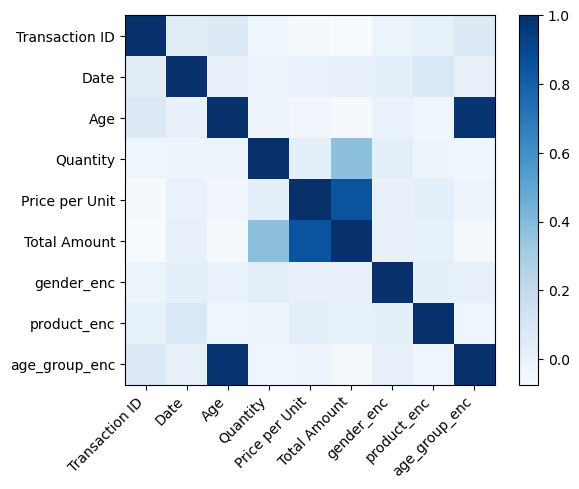

In [67]:
corr_matrix = mod_df.corr()

#plot the matrix
plt.imshow(corr_matrix, cmap='Blues')

#add colorbar
plt.colorbar()

#extract variables name
variables = []
for i in corr_matrix.columns:
    variables.append(i)

#add labels to the matrix
plt.xticks(range(len(corr_matrix)), variables, rotation=45, ha='right')
plt.yticks(range(len(corr_matrix)), variables)

#display the plot
plt.show()

### Checking for outliers

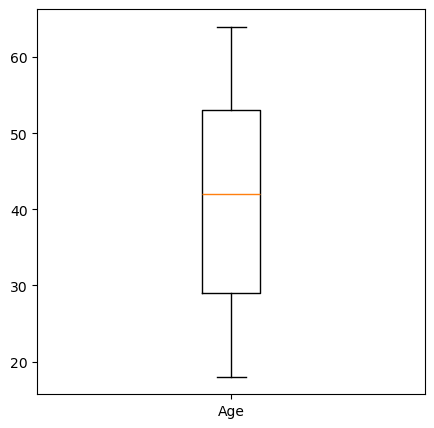

In [69]:
# Age outlier
fig = plt.figure(figsize=(5,5))
plt.boxplot(df['Age'], labels=['Age'])
plt.show()

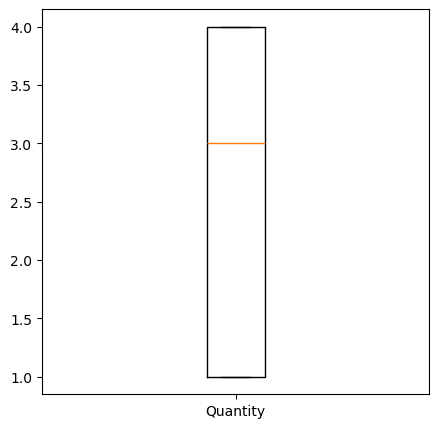

In [71]:
# Quantity outlier
fig = plt.figure(figsize=(5,5))
plt.boxplot(df['Quantity'], labels=['Quantity'])
plt.show()

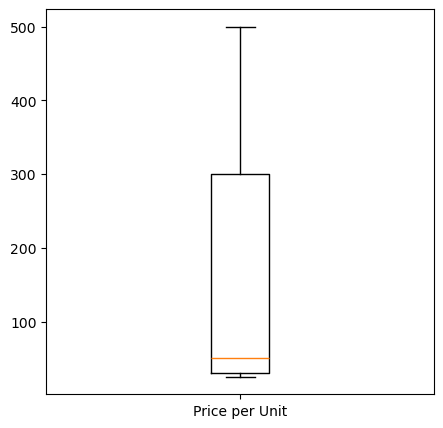

In [73]:
#Price per Unit outlier
fig = plt.figure(figsize=(5,5))
plt.boxplot(df['Price per Unit'], labels=['Price per Unit'])
plt.show()

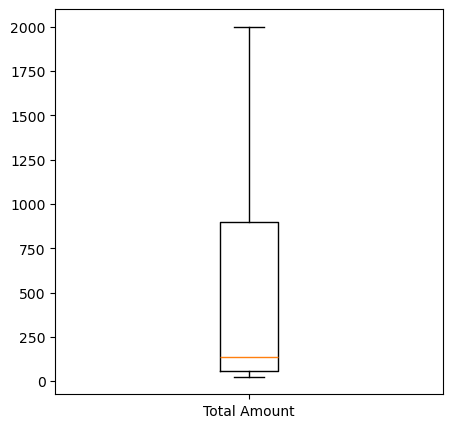

In [75]:
# Price per Unit outlier
fig = plt.figure(figsize=(5,5))
plt.boxplot(df['Total Amount'], labels=['Total Amount'])
plt.show()

In [77]:
z_scores = stats.zscore(df['Age'])
outliers = df[(z_scores < -3) | (z_scores > 3)]

In [79]:
print(z_scores)

0      0.336975
1     -0.028666
2     -0.101795
3     -1.637490
4     -1.637490
         ...   
995    0.702617
996   -0.833078
997    1.360772
998    0.044462
999    0.995131
Name: Age, Length: 1000, dtype: float64


In [81]:
print(outliers)

Empty DataFrame
Columns: [Transaction ID, Date, Customer ID, Gender, Age, Product Category, Quantity, Price per Unit, Total Amount, gender_enc, product_enc, age_group_enc]
Index: []


In [83]:
# creating age group

age_group = []

for i in range(df.shape[0]):
    if df['Age'][i] < 18:
        age_group.append('(below 18)')
    elif df['Age'][i] >= 18 and df['Age'][i] < 25:
        age_group.append('(18-24)')
    elif df['Age'][i] >= 25 and df['Age'][i] < 35:
        age_group.append('(25-34)')
    elif df['Age'][i] >= 35 and df['Age'][i] < 45:
        age_group.append('(35-44)')
    elif df['Age'][i] >= 45 and df['Age'][i] < 55:
        age_group.append('(45-54)')
    elif df['Age'][i] >= 55 and df['Age'][i] < 65:
        age_group.append('(55-64)')
    else:
        age_group.append('(65 above)')

In [85]:
df['age_group'] = age_group

In [87]:
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,gender_enc,product_enc,age_group_enc,age_group
0,522,2023-01-01,CUST522,Male,46,Beauty,3,500,1500,0,3,5,(45-54)
1,180,2023-01-01,CUST180,Male,41,Clothing,3,300,900,0,2,4,(35-44)
2,559,2023-01-01,CUST559,Female,40,Clothing,4,300,1200,1,2,4,(35-44)
3,303,2023-01-02,CUST303,Male,19,Electronics,3,30,90,0,3,2,(18-24)
4,979,2023-01-02,CUST979,Female,19,Beauty,1,25,25,1,3,2,(18-24)


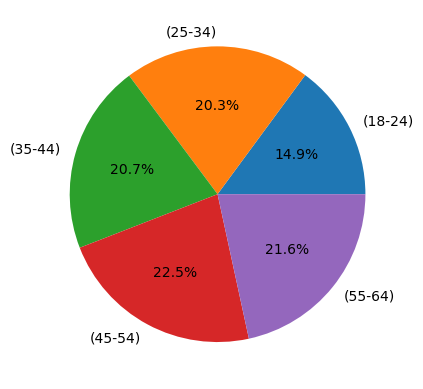

In [89]:
label, count = np.unique(df['age_group'], return_counts=True)

plt.pie(count, labels=label, autopct='%1.1f%%')
plt.savefig(os.getcwd()+'/img/'+'agecomp.png')
plt.show()

/var/folders/t7/f_vq642d0gg7txx1c91rkzy80000gn/T/ipykernel_1365/2229003006.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(i, y[i], y[i], ha = 'center')


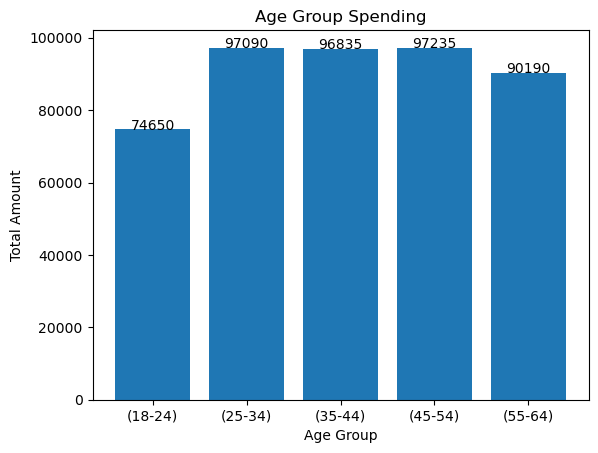

In [91]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center')


label = np.unique(df['age_group'])
total = df.groupby(['age_group'])['Total Amount'].sum()

addlabels(label, total)

plt.title('Age Group Spending')

plt.xlabel('Age Group')
plt.ylabel('Total Amount')

plt.bar(label, total)
plt.savefig(os.getcwd()+'/img/'+'agegroupspending.png')
plt.show()

In [93]:
df.groupby(['age_group','Gender'])['Total Amount'].sum()

age_group  Gender
(18-24)    Female    35920
           Male      38730
(25-34)    Female    51850
           Male      45240
(35-44)    Female    52965
           Male      43870
(45-54)    Female    46825
           Male      50410
(55-64)    Female    45280
           Male      44910
Name: Total Amount, dtype: int64

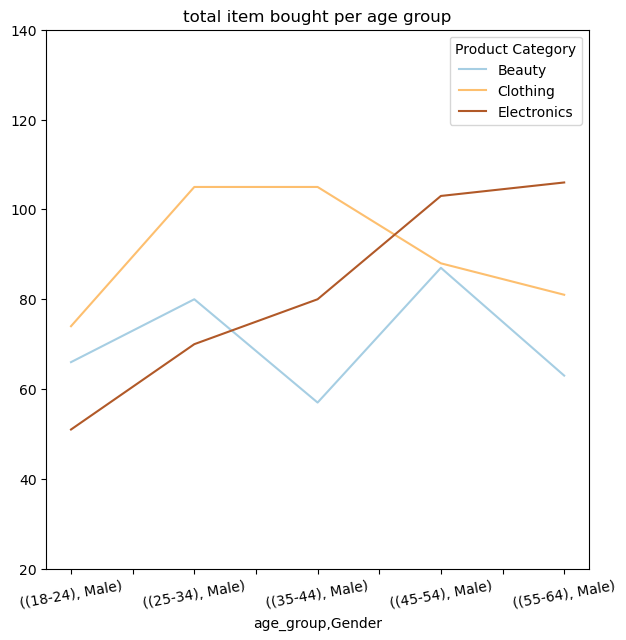

In [495]:
fig = df.query("Gender == 'Male'").groupby(['age_group','Gender','Product Category'])['Quantity'].sum().unstack().plot.line(
    colormap='Paired', 
    logy=False,
    figsize=(7,7),
    ylim=(20,140),
    rot=10,
    title='total item bought per age group').get_figure()

fig.savefig(os.getcwd()+'/img/'+'maleitemboughtperagegroup.png')

In [97]:
There is a rise in Clothing spending in Female from age group 18-24 to 35-44 
Male spending in Clothing also rise from 18-24 and maintain peak at age group 45-54

SyntaxError: invalid syntax (422654589.py, line 1)

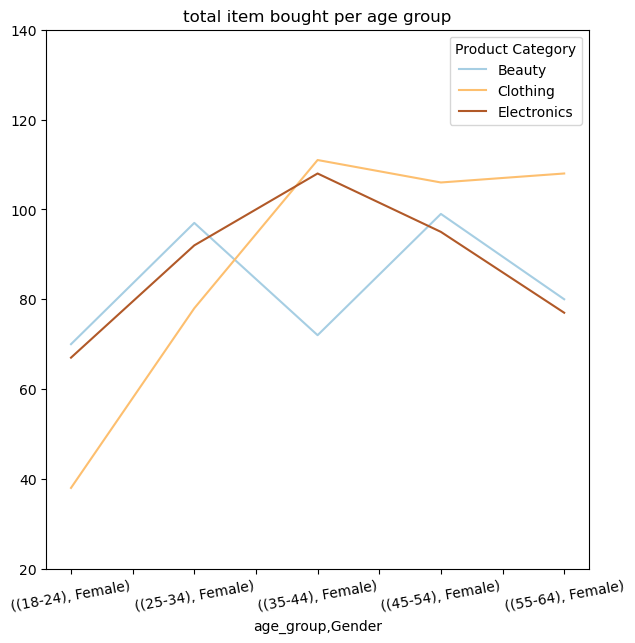

In [493]:
fig = df.query("Gender == 'Female'").groupby(['age_group','Gender','Product Category'])['Quantity'].sum().unstack().plot.line(
    colormap='Paired', 
    logy=False,
    figsize=(7,7),
    ylim=(20,140),
    rot=10,
    title='total item bought per age group').get_figure()

fig.savefig(os.getcwd()+'/img/'+'femaleitemboughtperagegroup.png')

In [101]:
df['quarter'] = pd.PeriodIndex(df['Date'], freq='M')
df['quarterc'] = df['quarter'].astype('string')

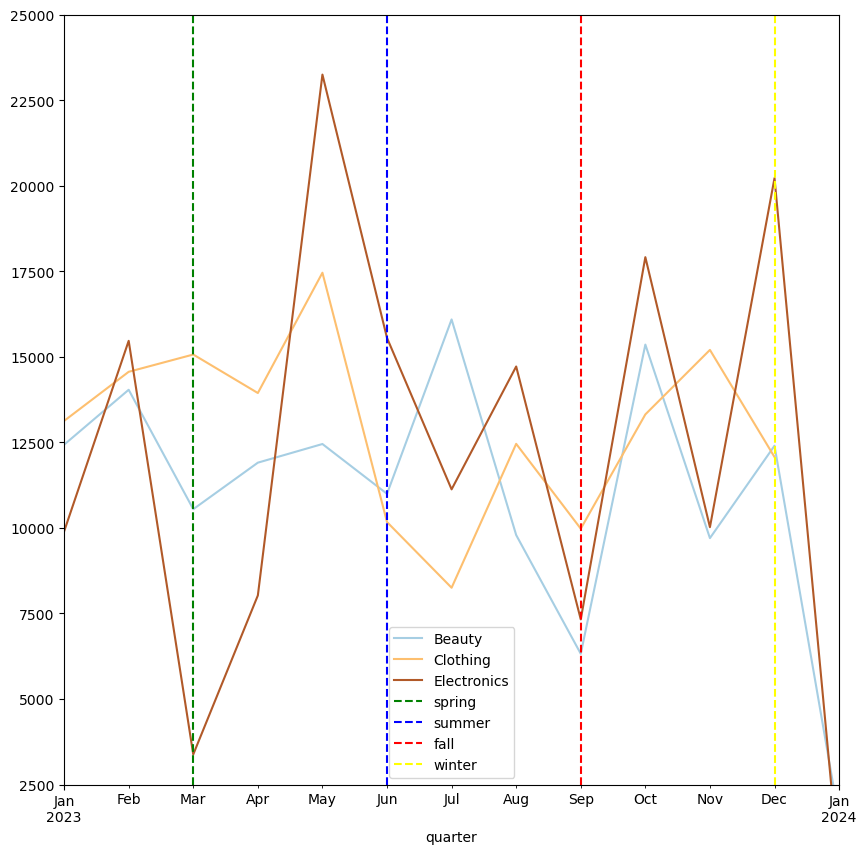

In [437]:
ax = df.pivot_table(index='quarter',
                    columns='Product Category',
                    values='Total Amount',
                    aggfunc='sum').plot(figsize=(10,10),
                                        ylim=(2500,25000),
                                        colormap='Paired')

#plot dotted line to show seasons
ax.axvline('2023-03-01', color='green', linestyle='dashed', label='spring')
ax.axvline('2023-06-01', color='blue', linestyle='dashed', label='summer')
ax.axvline('2023-09-01', color='red', linestyle='dashed', label='fall')
ax.axvline('2023-12-01', color='yellow', linestyle='dashed', label='winter')

ax.legend()
ax.figure.savefig(os.getcwd()+'/img/'+'salesovertime.png')

In [238]:
season = []
spring = pd.date_range('2023-03-01','2023-05-31').tolist()
summer = pd.date_range('2023-06-01','2023-08-31').tolist()
fall = pd.date_range('2023-09-01','2023-11-30').tolist()
winter = pd.date_range('2022-12-01','2023-02-28').tolist()

In [244]:
for i in range(df.shape[0]):
    if df['Date'][i] in spring:
        season.append('spring')
    elif df['Date'][i] in summer:
        season.append('summer')
    elif df['Date'][i] in fall:
        season.append('fall')
    else:
        season.append('winter')

In [248]:
df['season'] = season

In [262]:
df.sort_values(['Product Category','Total Amount'], ascending=False).groupby(['season','Product Category'])['Total Amount'].sum()

season  Product Category
fall    Beauty              31375
        Clothing            38490
        Electronics         35255
spring  Beauty              34900
        Clothing            46460
        Electronics         34650
summer  Beauty              36875
        Clothing            30875
        Electronics         41390
winter  Beauty              40365
        Clothing            39755
        Electronics         45610
Name: Total Amount, dtype: int64

In [487]:
df.groupby('Product Category')['Price per Unit'].describe()

,count,mean,std,min,25%,50%,75%,max
Product Category,,,,,,,,
Beauty,307.0,184.055375,194.929399,25.0,30.0,50.0,300.0,500.0
Clothing,351.0,174.287749,186.017065,25.0,30.0,50.0,300.0,500.0
Electronics,342.0,181.900585,189.049673,25.0,30.0,50.0,300.0,500.0
